# Telecom Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import churn_data dataset

churn_data = pd.read_csv("C:\\Users\\exsxaxr\\Downloads\\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Import customer_data

cust_data = pd.read_csv("C:\\Users\\exsxaxr\\Downloads\\customer_data.csv")
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
# Import internet_data

int_data = pd.read_csv("C:\\Users\\exsxaxr\\Downloads\\internet_data.csv")
int_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
# Merging all dataset based on cutomer ID

df = pd.merge(churn_data, cust_data, how='inner', on='customerID')
final_df = pd.merge(df, int_data, how='inner', on='customerID')

In [6]:
final_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
final_df.shape

(7043, 21)

In [9]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00


In [10]:
# Checking null values

final_df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

## EDA

In [11]:
# There are some blank values in TotalCharges column.

final_df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [12]:
final_df['TotalCharges'] = final_df['TotalCharges'].replace(' ', np.nan)

In [13]:
final_df['TotalCharges'].describe()

count     7032
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [14]:
# Changing the dtype to numeric

final_df['TotalCharges'] = pd.to_numeric(final_df['TotalCharges'])

In [15]:
final_df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [16]:
final_df.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

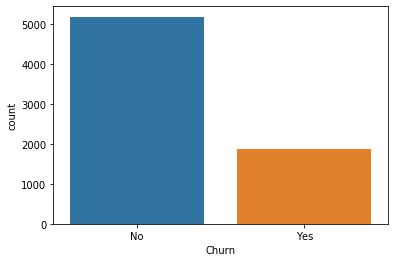

In [17]:
sns.countplot(final_df['Churn'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A494A42C08>],
      dtype=object)

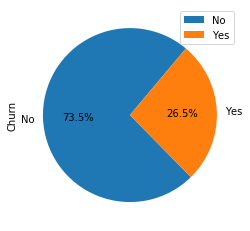

In [18]:
pie_churn = pd.DataFrame(final_df.Churn.value_counts())
pie_churn.plot.pie(subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', startangle=50)

In [19]:
# We have a churn rate of 26.5%

In [20]:
final_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [21]:
final_df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

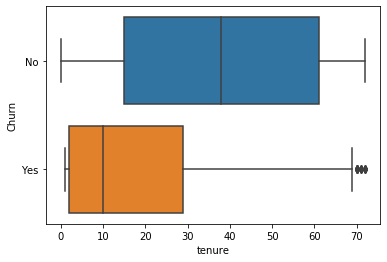

In [22]:
# Finding the time for which a customer is using the service

sns.boxplot(x='tenure', y='Churn', data=final_df)

In [23]:
# Cutomer with more tenure churns less

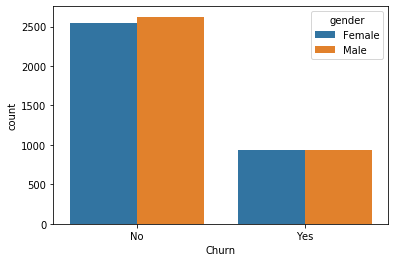

In [24]:
# Find churn rate based on gender

sns.countplot(df['Churn'], hue=df['gender'])

In [25]:
# Looks like there is no relation between churn rate and gender

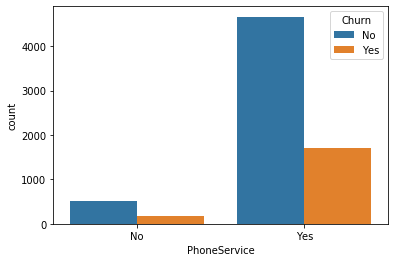

In [26]:
sns.countplot(final_df['PhoneService'], hue=final_df['Churn'])

Text(0.5, 1.0, 'Churn Rate for customers \n opted for Phone Service')

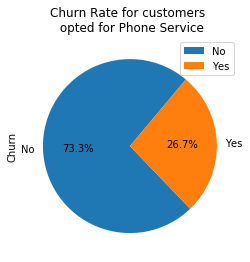

In [27]:
# Churn rate of customers who opted for phone service

pie_phone_service = pd.DataFrame(final_df[final_df['PhoneService']=='Yes']['Churn'].value_counts())
pie_phone_service.plot.pie(subplots=True, labels = pie_phone_service.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')

Text(0.5, 1.0, 'Churn Rate for customers \n that did not opt for Phone Service')

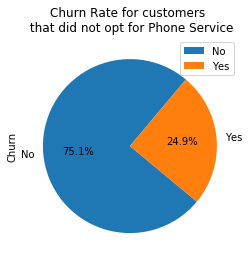

In [28]:
# Churn rate of customers who didn't opt for phone service

pie_no_phone_service = pd.DataFrame(final_df[final_df['PhoneService']=='No']['Churn'].value_counts())
pie_no_phone_service.plot.pie(subplots=True, labels = pie_no_phone_service.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n that did not opt for Phone Service')

In [29]:
# Phone service is not having a big impact in churn rate

In [30]:
# Find churn rate vs Contract relationship

final_df['Contract'].describe()

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

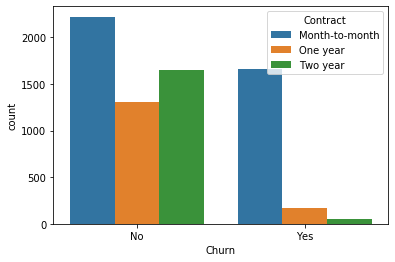

In [31]:
sns.countplot(final_df['Churn'], hue=final_df['Contract'])

Text(0.5, 1.0, 'Month-to-Month contract Churn rate')

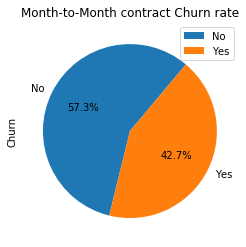

In [32]:
pie_month_contract = pd.DataFrame(final_df[final_df['Contract']=='Month-to-month']['Churn'].value_counts())
pie_month_contract.plot.pie(subplots=True, labels = pie_month_contract.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Month-to-Month contract Churn rate')

Text(0.5, 1.0, 'Churn rate of customers with one year contract')

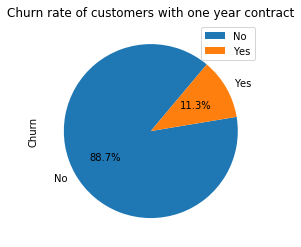

In [33]:
pie_oneyear_contract = pd.DataFrame(final_df[final_df['Contract']=='One year']['Churn'].value_counts())
pie_oneyear_contract.plot.pie(subplots=True, labels = pie_oneyear_contract.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn rate of customers with one year contract')

Text(0.5, 1.0, 'Churn rate of customers with one year contract')

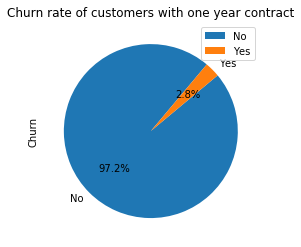

In [34]:
pie_twoyear_contract = pd.DataFrame(final_df[final_df['Contract']=='Two year']['Churn'].value_counts())
pie_twoyear_contract.plot.pie(subplots=True, labels = pie_oneyear_contract.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn rate of customers with one year contract')

In [35]:
# Customers with month to month contract are more likely to churn

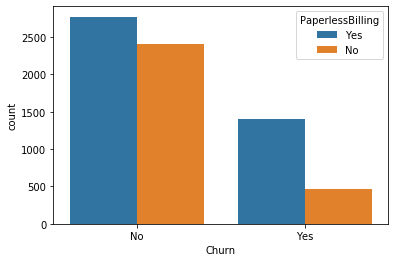

In [36]:
#Paperless Billing vs Churn rate

sns.countplot(final_df['Churn'], hue=final_df['PaperlessBilling'])

Text(0.5, 1.0, 'Churn rate of customers who \n opted for Paperless Billing')

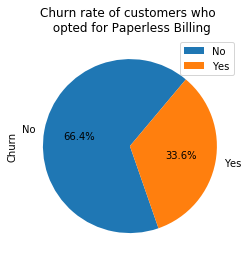

In [37]:
pie_paperless_yes = pd.DataFrame(final_df[final_df['PaperlessBilling']=='Yes']['Churn'].value_counts())
pie_paperless_yes.plot.pie(subplots=True, labels = pie_paperless_yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn rate of customers who \n opted for Paperless Billing')

Text(0.5, 1.0, 'Churn rate of customers who \n did not opt for Paperless Billing')

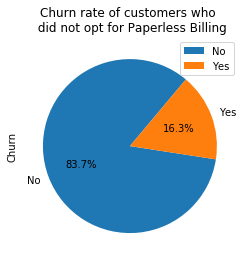

In [38]:
pie_paperless_no = pd.DataFrame(final_df[final_df['PaperlessBilling']=='No']['Churn'].value_counts())
pie_paperless_no.plot.pie(subplots=True, labels = pie_paperless_no.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn rate of customers who \n did not opt for Paperless Billing')

In [39]:
# Churn rate is more for people who opted for paperless billing

In [40]:
final_df['PaymentMethod'].describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

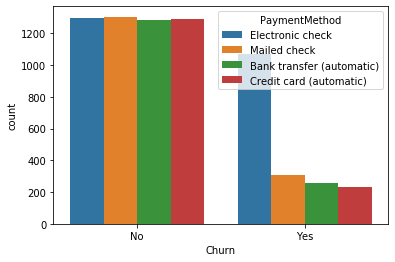

In [41]:
sns.countplot(final_df['Churn'], hue=final_df['PaymentMethod'])

In [42]:
# Customers with Electronic Check tends to churn more than other payment methods.

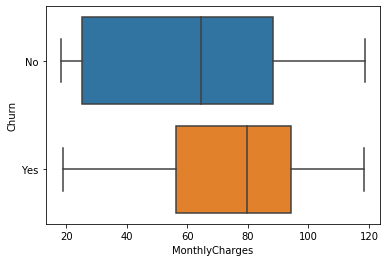

In [43]:
# Monthly Charges

sns.boxplot(x = final_df['MonthlyCharges'], y=final_df['Churn'])

In [44]:
# Median mothly charges are higher for churned customers

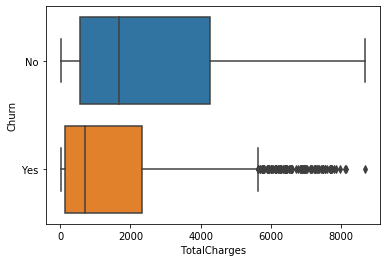

In [45]:
# Total Charges

sns.boxplot(x = final_df['TotalCharges'], y=final_df['Churn'])

In [46]:
# Median total charges are low for customers whi have churned

Text(0.5, 1.0, 'Senior Citizen Churn rate')

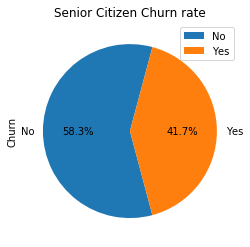

In [47]:
# Senior citizens

pie_senior = pd.DataFrame(final_df[final_df['SeniorCitizen']==1]['Churn'].value_counts())
pie_senior.plot.pie(subplots=True, labels = pie_senior.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Senior Citizen Churn rate')

Text(0.5, 1.0, 'Non Senior Citizen Churn rate')

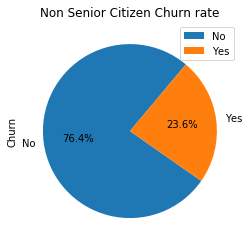

In [48]:
# Non Senior citizens

pie_no_senior = pd.DataFrame(final_df[final_df['SeniorCitizen']==0]['Churn'].value_counts())
pie_no_senior.plot.pie(subplots=True, labels = pie_senior.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Non Senior Citizen Churn rate')

In [49]:
# Churn rate is more for senior citizens

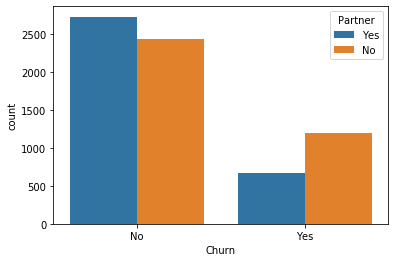

In [50]:
# Partner

sns.countplot(final_df['Churn'], hue=final_df['Partner'])

In [51]:
# Single customers are more likely to churn than married customers

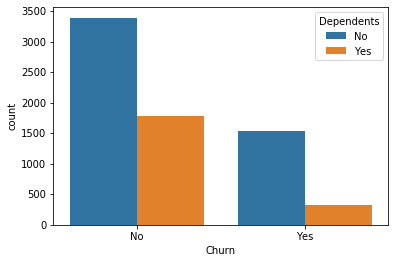

In [52]:
# Depnedents

sns.countplot(final_df['Churn'], hue=final_df['Dependents'])

In [53]:
# Customers without dependants tends to churn more

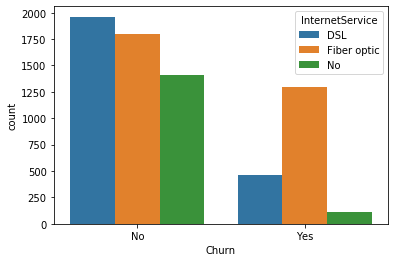

In [54]:
# Internet Service

sns.countplot(final_df['Churn'], hue=final_df['InternetService'])

In [55]:
# Customers with Fiberoptic connection tends to churn more

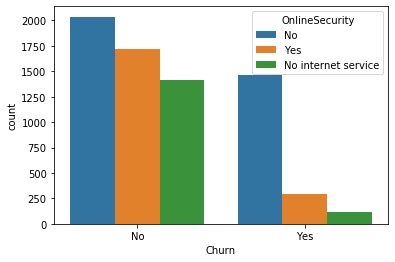

In [56]:
# Online security

sns.countplot(final_df['Churn'], hue=final_df['OnlineSecurity'])

In [57]:
# Customers with no online securty opts to churn more

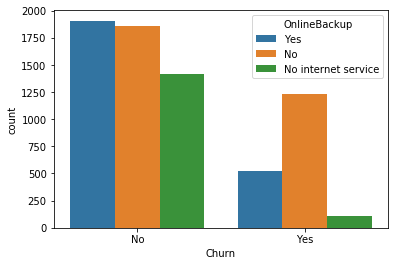

In [58]:
# Online Backup

sns.countplot(final_df['Churn'], hue=final_df['OnlineBackup'])

In [59]:
# Customers with no online backup tends to churn more

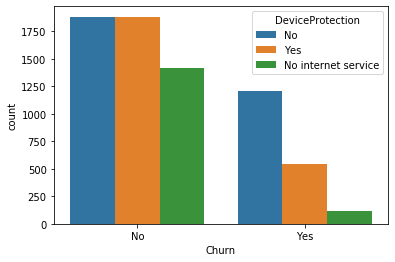

In [60]:
# Device Protection

sns.countplot(final_df['Churn'], hue=final_df['DeviceProtection'])

In [61]:
# Customers with no device protection tends to churn more

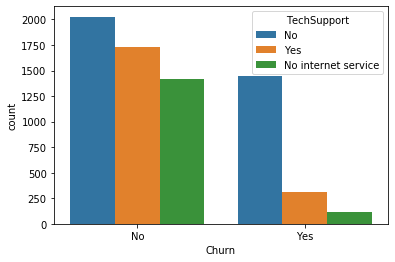

In [62]:
# Tech support

sns.countplot(final_df['Churn'], hue=final_df['TechSupport'])

In [63]:
# Customers with no tech support tends to churn more

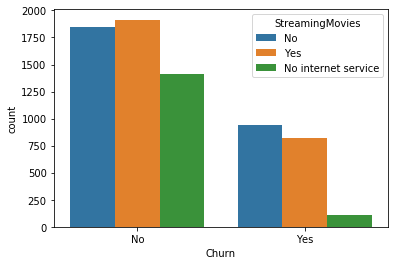

In [64]:
# Streaming Movies

sns.countplot(final_df['Churn'], hue=final_df['StreamingMovies'])

In [65]:
# STreaming movies is not having any impact on customer churn

## Model Building

In [66]:
# Convert binary values(yes/no) into numeric

In [67]:
binary_list=['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
final_df[binary_list] = final_df[binary_list].apply(lambda x: x.map({'Yes': 1, "No": 0}))

In [68]:
final_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(2), int64(7), object(

In [70]:
# dropping irrelevant columns

final_df = final_df.drop(['customerID'], axis=1)
final_df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [71]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(final_df[['Contract', 'gender', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)

# Adding the results to the master dataframe
final_df = pd.concat([final_df, dummy1], axis=1)

In [72]:
final_df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,...,0,1,0,0,0,0,0,0,0,0
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,...,0,0,0,1,0,1,0,0,0,0
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 40 columns):
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
Contract                                 7043 non-null object
PaperlessBilling                         7043 non-null int64
PaymentMethod                            7043 non-null object
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
gender                                   7043 non-null object
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
MultipleLines                            7043 non-null object
InternetService                          7043 non-null object
OnlineSecurity                

In [74]:
final_df = final_df.drop(['Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)
final_df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,Female,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,Male,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,Male,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,Male,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,1,Female,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
final_df['gender'] = pd.get_dummies(final_df['gender'])
final_df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
final_df['MultipleLines'] = pd.get_dummies(final_df['MultipleLines'])
final_df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


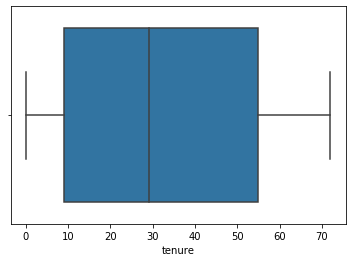

In [77]:
# Checking for outliers in the continuous variables

sns.boxplot(x=final_df['tenure'])

In [78]:
# There are no outliers in tenure feature

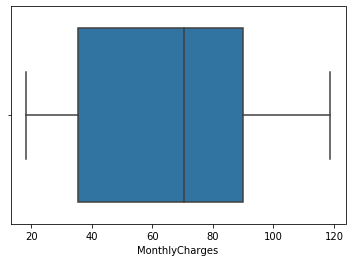

In [79]:
sns.boxplot(x=final_df['MonthlyCharges'])

In [80]:
# There are no outliers in MonthlyCharges feature

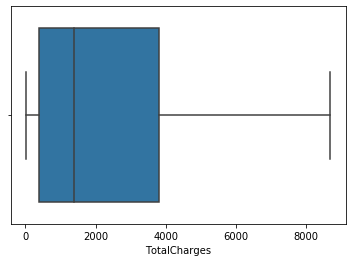

In [81]:
sns.boxplot(final_df['TotalCharges'])

In [82]:
# There are no outliers in TotalCharges feature as well

In [83]:
# Check for missing values

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
gender                                   7043 non-null uint8
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
MultipleLines                            7043 non-null uint8
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
gender_Male                              7043 non-null uint8
PaymentMethod_Credit card (automati

In [84]:
final_df.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
MultipleLines                             0
Contract_One year                         0
Contract_Two year                         0
gender_Male                               0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                

In [85]:
# Since the null values are very less in number, better to remove it

final_df = final_df[~np.isnan(final_df['TotalCharges'])]

In [86]:
final_df.isnull().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
MultipleLines                            0
Contract_One year                        0
Contract_Two year                        0
gender_Male                              0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProte

#### Balance the dataset

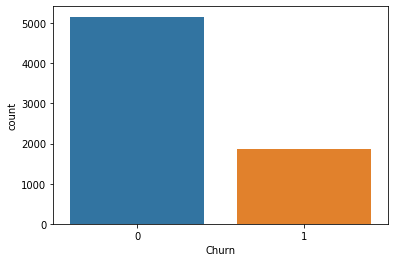

In [87]:
sns.countplot(final_df.Churn)

In [88]:
from sklearn.utils import resample

churn = final_df[final_df.Churn == 1]
not_churn = final_df[final_df.Churn == 0]

In [89]:
upsampled_df = resample(churn, replace=True, n_samples=len(not_churn), random_state=27)
sampled_df = pd.concat([not_churn, upsampled_df])
sampled_df.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

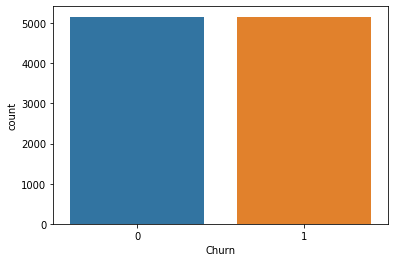

In [90]:
# After sampling

sns.countplot(sampled_df.Churn)

### Train-Test split

In [91]:
from sklearn.model_selection import train_test_split
X = sampled_df.drop('Churn', axis=1)
y= sampled_df['Churn']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

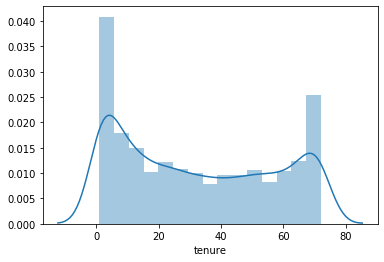

In [93]:
sns.distplot(final_df['tenure'])

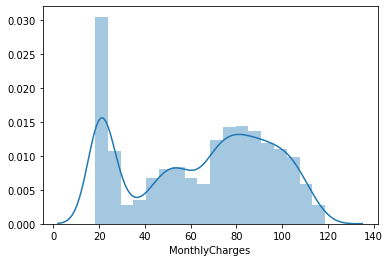

In [94]:
sns.distplot(final_df['MonthlyCharges'])

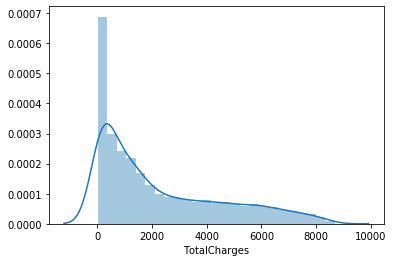

In [95]:
sns.distplot(final_df['TotalCharges'])

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [97]:
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [98]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
6868,0.169014,1,1,0.725598,0.128883,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5521,0.816901,1,1,0.462151,0.428877,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
6728,1.000000,1,0,0.965139,0.961332,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,1
1186,0.802817,1,1,0.426295,0.399256,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2407,0.014085,1,1,0.522410,0.014153,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


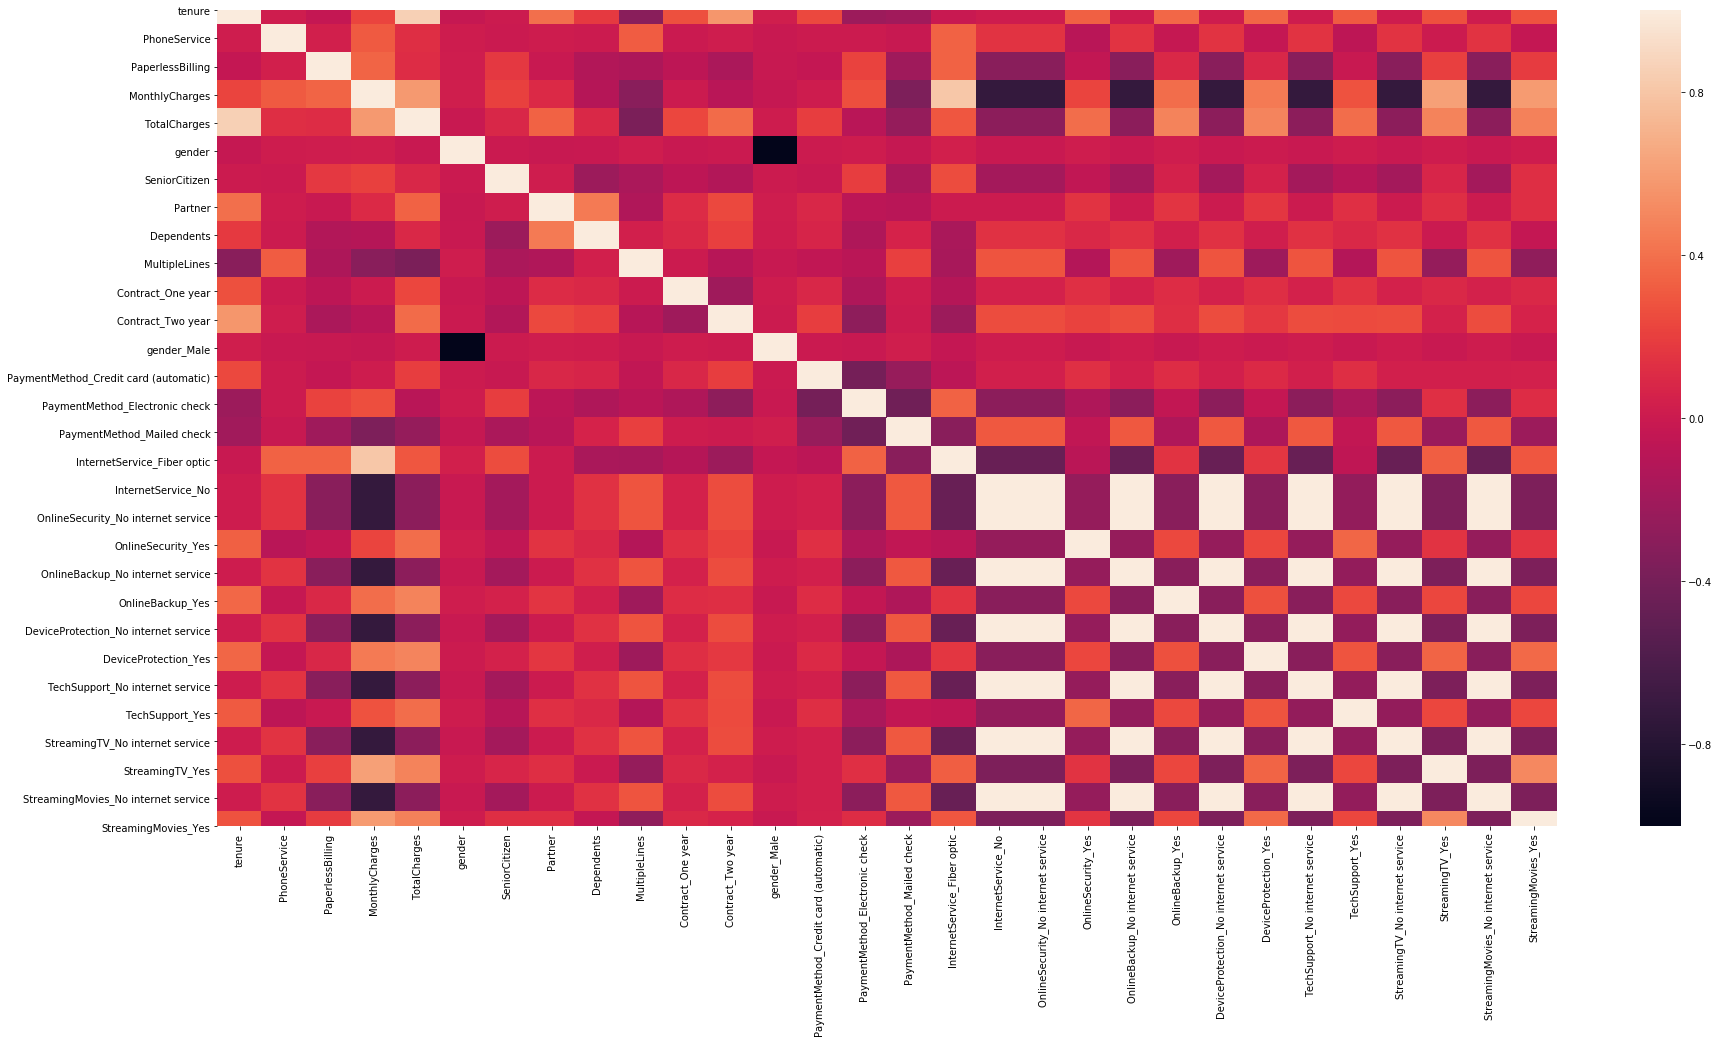

In [99]:
# Checking correlation

plt.figure(figsize = (30,15)) 
sns.heatmap(X_train.corr())
plt.show()

In [100]:
# Many dummy variables are highly correlated. Dropping them

X_train = X_train.drop(['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service'], axis=1)
X_test = X_test.drop(['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service'], axis=1)

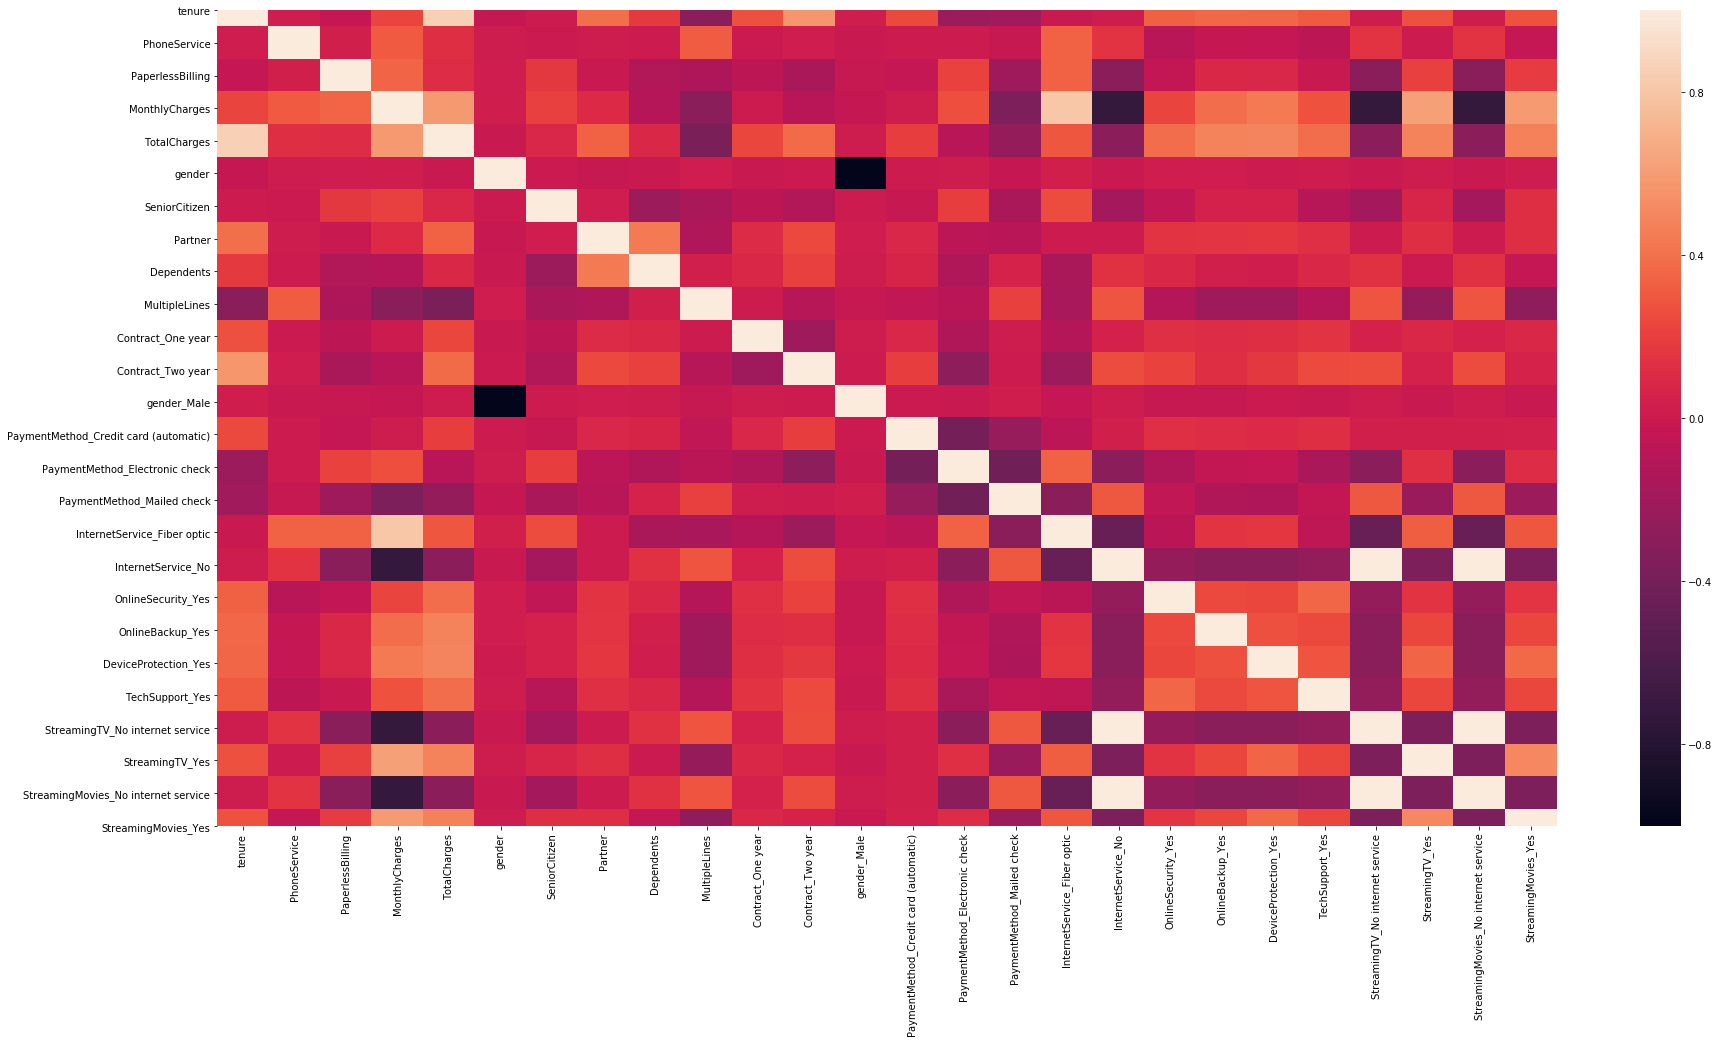

In [101]:
# Checking correlation again

plt.figure(figsize = (30,15)) 
sns.heatmap(X_train.corr())
plt.show()

In [102]:
X_train.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'Contract_One year', 'Contract_Two year',
       'gender_Male', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [103]:
X_train = X_train.drop(['StreamingTV_No internet service','StreamingMovies_No internet service'], axis=1)
X_test = X_test.drop(['StreamingTV_No internet service','StreamingMovies_No internet service'], axis=1)

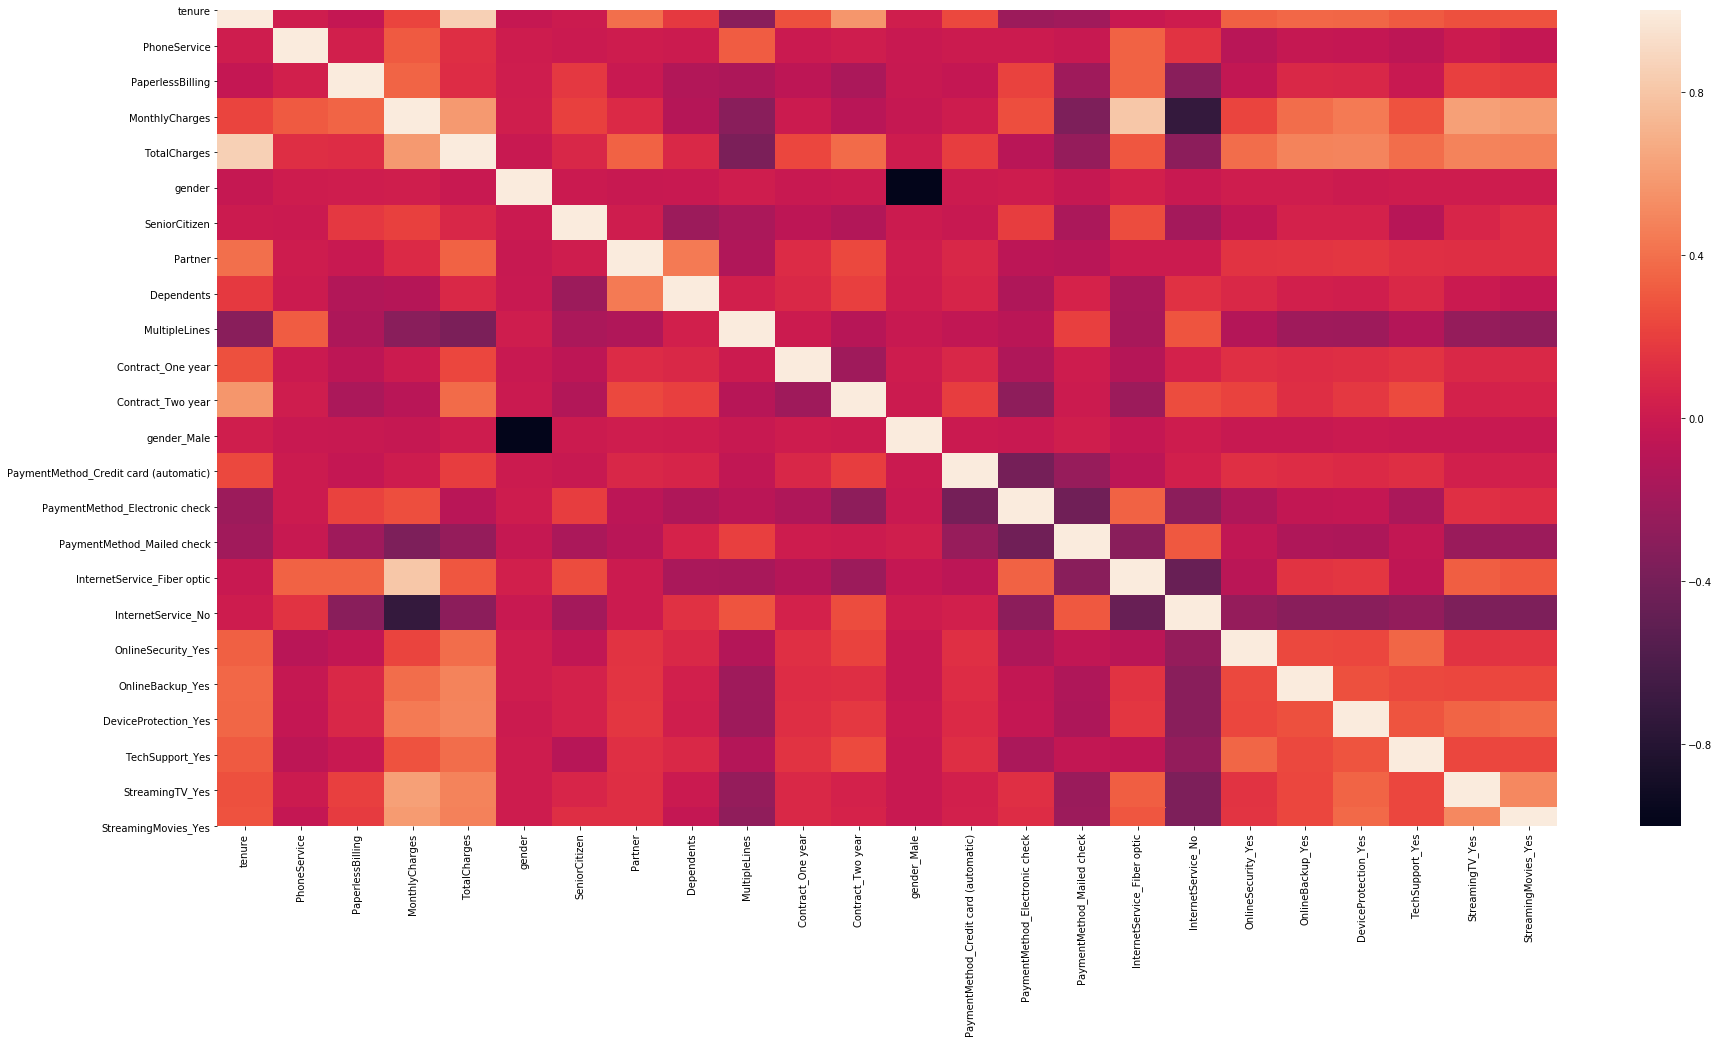

In [104]:
# Checking correlation again

plt.figure(figsize = (30,15)) 
sns.heatmap(X_train.corr())
plt.show()

In [105]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
log_model.score(X_train, y_train)

0.7714443829551744

In [107]:
log_model.score(X_test, y_test)

0.763395739186572

In [108]:
y_pred = log_model.predict(X_test)

In [109]:
from sklearn import metrics

print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("\nSummary: \n", metrics.classification_report(y_test, y_pred))


Confusion Matrix: 
 [[1123  410]
 [ 323 1242]]

Summary: 
               precision    recall  f1-score   support

           0       0.78      0.73      0.75      1533
           1       0.75      0.79      0.77      1565

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



### KNN Model

In [110]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [111]:
predicted = NNH.predict(X_test)
NNH_score = NNH.score(X_test, y_test)
print("Accuracy = ", NNH_score)
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,predicted))
print("\nSummary : \n", metrics.classification_report(y_test, predicted))

Accuracy =  0.8166559070367979

Confusion Matrix:
 [[1075  458]
 [ 110 1455]]

Summary : 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1533
           1       0.76      0.93      0.84      1565

    accuracy                           0.82      3098
   macro avg       0.83      0.82      0.81      3098
weighted avg       0.83      0.82      0.81      3098



AxesSubplot(0.125,0.125;0.775x0.755)


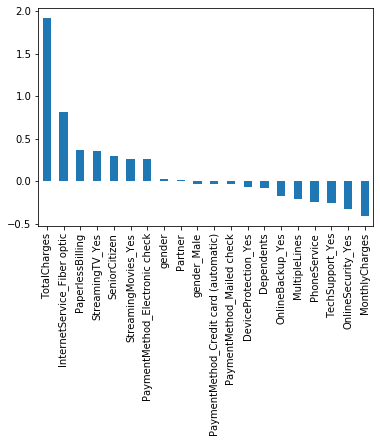

In [112]:
weights = pd.Series(log_model.coef_[0],
                 index=X_train.columns.values)
print (weights.sort_values(ascending = False)[:20].plot(kind='bar'))

In [113]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [114]:
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7704970948999355


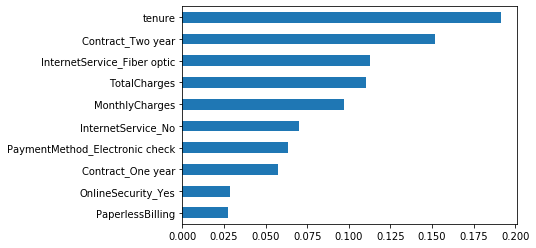

In [115]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X_train.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [116]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.775984506132989

In [117]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8298902517753389

### Model Tuning using hyper parameters

In [118]:
# GridsearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[50, 100],
    "loss" : ['ls', 'lad', 'huber', 'quantile']
    }

In [119]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = 4, verbose = 0, return_train_score=True)

In [120]:
grid_search.fit(X_train, y_train)

[13:13:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion, loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_job...
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion'

In [124]:
best_grid = grid_search.best_estimator_

In [125]:
best_grid.score(X_test, y_test)

0.842156229825694

In [135]:
 best_grid.feature_importances_

array([0.0131613 , 0.01287872, 0.01016788, 0.01027847, 0.01065227,
       0.00909984, 0.00872522, 0.00720036, 0.00886031, 0.00969478,
       0.15506282, 0.44353077, 0.        , 0.00793634, 0.00915386,
       0.00941004, 0.12756857, 0.06324624, 0.01014518, 0.00987575,
       0.00830101, 0.00971584, 0.02237111, 0.02296324], dtype=float32)

In [136]:
X_train.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'Contract_One year', 'Contract_Two year',
       'gender_Male', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [137]:
X_train1 = X_train.drop(['gender', 'gender_Male', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines'], axis=1)

In [138]:
X_test1 = X_test.drop(['gender', 'gender_Male', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines'], axis=1)

In [139]:
grid_search.fit(X_train1, y_train)

[14:15:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion, loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_job...
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion'

In [140]:
best_grid1 = grid_search.best_estimator_
best_grid1.score(X_test1, y_test)

0.8376371852808263

In [141]:
best_grid1.feature_importances_

array([0.01505147, 0.01365089, 0.01137833, 0.01188656, 0.01090793,
       0.00866079, 0.00856671, 0.00982643, 0.18885858, 0.4549529 ,
       0.00955233, 0.00925751, 0.00823327, 0.12661433, 0.07194933,
       0.01122935, 0.00959028, 0.00891872, 0.01091432], dtype=float32)